# FIFA Data Analysis and Visualization

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. Announced on 6 June 2018 for its E3 2018 press conference, it was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.

## Abstract

The dataset contains the detailed attributes for every player registered in the latest edition of FIFA 19 database. Examples of these attributes include: Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, etc. 

Football has always been touted as an immeasureable sport. Different coaches and experts have their own definition and perspective of what makes a football player great. Today, with advancements in technology, we are able to capture multiple isolated events during a football match for analytics. Hence, the aim of this data analysis and visualization project is to identify the characteristics of the best performing players and investigate which of these isolated events and skills are required for each position. This will provide insights to coaches on how to train and identify effectively the next Lionel Messi and Cristiano Ronaldo in football.  

## Overview

This project begins with the data cleaning and processing, followed by an initial exploratory data analysis to identify the distributions of each fields, and a graphical analysis of the best performing players. Following this, the project will investigate the characteristics of these players and draw insights on the upcoming talents in FIFA.

## References:
[1] Data scraped from https://sofifa.com/ and provided on kaggle by Karan Gadiya https://www.kaggle.com/karangadiya/fifa19



## Data Cleaning and Processing

In [116]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

cwd = os.getcwd()
path = 'C:\\Users\\User\\Desktop\\Tech Code\\Python\\Data Visualization'
os.chdir(path)
dat = pd.read_csv("data.csv",  encoding = 'utf-8') # UTF helps to fix the latin special characters in the dataset
dat = dat.drop(dat.columns[0], axis = 1)
dat.head()
# Removing spaces in the column names to enable easy column reference  
dat.columns = dat.columns.str.replace(' ','')
# Removing special characters (e.g. euro dollar sign)
euro_sign = dat['ReleaseClause'][0][:3]
dat['ReleaseClause'] = dat['ReleaseClause'].str.replace(euro_sign,'')
dat['Value'] = dat['Value'].str.replace(euro_sign,'')
dat['Wage'] = dat['Wage'].str.replace(euro_sign,'')
dat['ReleaseClause'] = dat['ReleaseClause'].str.replace('M','') # Removing Millions in the field
dat['Value'] = dat['Value'].str.replace('M','') # Removing Millions in the field
dat['Wage'] = dat['Wage'].str.replace('K','') # Removing Thousands in the field

# Converting wages,release clause, value from string into integers/float
dat.ReleaseClause = pd.to_numeric(dat.ReleaseClause, errors='coerce')
dat.Value = pd.to_numeric(dat.Value, errors='coerce')
dat.Wage = pd.to_numeric(dat.Wage, errors='coerce')

# Converting Weight from string into integers/float
dat['Weight'] = dat['Weight'].str.replace('lbs','') # Removing lbs in the field
dat.Weight = pd.to_numeric(dat.Weight, errors='coerce')
# Use Regular Expression to convert Height from feet + inches into cm. Convert from text into integer
r = re.compile(r"([0-9]+)'([0-9]+)")    # to set the pattern e.g. 5'7 , 4'12 etc
def get_cm(height):
    height = str(height)
    m = r.match(height)
    if m == None:
        return float('NaN')
    else:
        return float(m.group(1))*30.48 + float(m.group(2))*2.54
dat["Height"] = dat["Height"].apply(lambda x:get_cm(x))

# check
# dat['ReleaseClause'].head()
# dat['Wage'].head()
# dat['Value'].head()
# dat['Weight'].head()
# dat['Height'].head()

# Drop unnecessary columns that are not used for analyzing a player's performance
# This inclues: 'Real Face', 'Jersey Number', 'Loaned From' LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM
# CDM, RDM, RWB LB, LCB, CB, RCB, RB
dat = dat.drop(dat.columns[27:53], axis = 1)
dat = dat.drop(labels = ['RealFace','JerseyNumber','LoanedFrom'], axis = 1)
#dat.head()

# Check for missing values
# Check if there any null values in the dataset 
dat.isnull().values.any() # There are indeed missing values in some rows in the dataset
dat.isnull().columns
#cols = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning']
# set mean values to all empty entries
dat['Crossing'].fillna(dat['Crossing'].mean(),inplace=True)
dat['Finishing'].fillna(dat['Finishing'].mean(),inplace=True)
dat['HeadingAccuracy'].fillna(dat['HeadingAccuracy'].mean(),inplace=True)
dat['ShortPassing'].fillna(dat['ShortPassing'].mean(),inplace=True)
dat['Volleys'].fillna(dat['Volleys'].mean(),inplace=True)
dat['Dribbling'].fillna(dat['Dribbling'].mean(), inplace=True)
dat['Curve'].fillna(dat['Curve'].mean(),inplace=True)
dat['FKAccuracy'].fillna(dat['FKAccuracy'].mean(),inplace=True)
dat['LongPassing'].fillna(dat['LongPassing'].mean(),inplace=True)
dat['BallControl'].fillna(dat['BallControl'].mean(),inplace=True)
dat['Acceleration'].fillna(dat['Acceleration'].mean(),inplace=True)
dat['SprintSpeed'].fillna(dat['SprintSpeed'].mean(),inplace=True)
dat['Agility'].fillna(dat['Agility'].mean(),inplace=True)
dat['Reactions'].fillna(dat['Reactions'].mean(),inplace=True)
dat['Balance'].fillna(dat['Balance'].mean(),inplace=True)
dat['ShotPower'].fillna(dat['ShotPower'].mean(),inplace=True)
dat['Jumping'].fillna(dat['Jumping'].mean(),inplace=True)
dat['Stamina'].fillna(dat['Stamina'].mean(),inplace=True)
dat['Strength'].fillna(dat['Strength'].mean(),inplace=True)
dat['LongShots'].fillna(dat['LongShots'].mean(),inplace=True)
dat['Aggression'].fillna(dat['Aggression'].mean(),inplace=True)
dat['Interceptions'].fillna(dat['Interceptions'].mean(),inplace=True)
dat['Positioning'].fillna(dat['Positioning'].mean(),inplace=True)
dat['Vision'].fillna(dat['Vision'].mean(),inplace=True)
dat['Penalties'].fillna(dat['Penalties'].mean(),inplace=True)
dat['Composure'].fillna(dat['Composure'].mean(),inplace=True)
dat['Marking'].fillna(dat['Marking'].mean(),inplace=True)
dat['StandingTackle'].fillna(dat['StandingTackle'].mean(),inplace=True)
dat['SlidingTackle'].fillna(dat['SlidingTackle'].mean(),inplace=True)
dat['GKDiving'].fillna(dat['GKDiving'].mean(),inplace=True)
dat['GKHandling'].fillna(dat['GKHandling'].mean(),inplace=True)
dat['GKKicking'].fillna(dat['GKKicking'].mean(),inplace=True)
dat['GKPositioning'].fillna(dat['GKPositioning'].mean(),inplace=True)

# Develop the FIFA attributes: Pace, Shooting, Passing, Dribbling, Defending, Physical
# Each of these attributes are made up of the following skills (https://www.fifauteam.com/fifa-18-attributes-guide/)
# Pace: Sprint Speed, Acceleration
# Shooting: FINISHING, LONG SHOTS, PENALTIES, POSITIONING, SHOT POWER, VOLLEYS
# PASSING: CROSSING, CURVE, FREE KICK, LONG PASSING, SHORT PASSING, VISION
# DRIBBLING: AGILITY, BALANCE, BALL CONTROL, COMPOSURE, DRIBBLING, REACTIONS
# DEFENDING: HEADING, INTERCEPTIONS, MARKING, SLIDING TACKLE, STANDING TACKLE
# PHYSICAL: AGGRESSION, JUMPING, STAMINA, STRENGTH
# GOALKEEPING: DIVING, HANDLING, KICKING, POSITIONING
dat['Pace'] = ( dat['SprintSpeed'] + dat['Acceleration'] ) /2 
dat['Shooting'] = ( dat['Finishing'] + dat['LongShots'] + dat['Penalties'] + dat['Positioning'] + dat['ShotPower'] + dat['Volleys'] ) / 6
dat['Passing'] = ( dat['Crossing'] + dat['Curve'] + dat['FKAccuracy'] + dat['LongPassing'] + dat['ShortPassing'] + dat['Vision'] ) / 6
dat['Dribbling Skill'] = ( dat['HeadingAccuracy'] + dat['Interceptions'] + dat['Marking'] + dat['StandingTackle'] + dat['SlidingTackle'] ) / 5
dat['Physical'] = ( dat['Aggression'] + dat['Jumping'] + dat['Stamina'] + dat['Strength'] ) / 4
dat['Goal Keeping'] = ( dat['GKDiving'] + dat['GKHandling'] + dat['GKKicking'] + dat['GKPositioning'] ) / 4
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,15.0,14.0,8.0,6.5,88.5,88.166667,90.333333,35.8,61.75,11.50
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,15.0,14.0,11.0,NaN,90.0,91.500000,80.166667,40.0,81.25,11.75
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,15.0,15.0,11.0,8.1,92.0,83.833333,83.833333,36.4,61.75,12.00
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,87.0,88.0,94.0,NaN,57.5,20.166667,37.666667,20.0,53.00,87.50
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,5.0,10.0,13.0,NaN,77.0,85.333333,89.666667,58.6,76.00,10.75


## Characteristics of the best players:

We would like to understand who are the best players for each player position in FIF19. Further we will like to analyse what are the characteristics of the best players. Do they have similar characteristics that are not observed in the less well-performed group of players? Further, we would like to analyse in the possibility that whether certain characteristics like weight, height, age, nationality, club, work rate, reputation, ratings and skills favors/discriminates against the overall performance.

- Are these players of a certain nationality?
- Are these players of a certain height and weight?
- Do players performs well at a certain age?
- Are the best players the players with a strong work rate?
- Do the reputation and ratings of the players correlate strongly with the overall performance? 


In [117]:
# The top 10 players based on the overall score are:
top_10 = dat.nlargest(10, 'Overall')
top_10[['Name','Overall','Club','Position']]



,Name,Overall,Club,Position
0,L. Messi,94,FC Barcelona,RF
1,Cristiano Ronaldo,94,Juventus,ST
2,Neymar Jr,92,Paris Saint-Germain,LW
3,De Gea,91,Manchester United,GK
4,K. De Bruyne,91,Manchester City,RCM
5,E. Hazard,91,Chelsea,LF
6,L. Modrić,91,Real Madrid,RCM
7,L. Suárez,91,FC Barcelona,RS
8,Sergio Ramos,91,Real Madrid,RCB
9,J. Oblak,90,Atlético Madrid,GK


In [118]:
# The best players in each position are (based on the overall score):
top_3_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
top_3_position.groupby(['Position']).head(1).sort_values(['Overall'],ascending = False)

# The top 3 players in each position are (based on the overall score):
top_3_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
top_3_position.groupby(['Position']).head(3)

# We would like to understand the characteristics of the best players

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Position' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'Position' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  import sys


ID                 Name  Age  \
Position                                          
CAM      17    194765         A. Griezmann   27   
         31    190460           C. Eriksen   26   
         61    201942      Roberto Firmino   26   
CB       12    182493             D. Godín   32   
         42    205600            S. Umtiti   24   
         73    177509           M. Benatia   31   
CDM      20    189511      Sergio Busquets   29   
         27    200145             Casemiro   26   
         72    180206            M. Pjanić   28   
CF       271   198706         Luis Alberto   25   
         293   184431          S. Giovinco   31   
         350   205175             A. Milik   24   
CM       67    189509               Thiago   27   
         78    223848  S. Milinković-Savić   23   
         121   205498             Jorginho   26   
GK       3     193080               De Gea   27   
         9     200389             J. Oblak   25   
         18    192448        M. ter Stegen   26   
LAM      28    198710         J. Rodríguez   26   
         365   199434             D. Tadić   29   
         1587  230408       Fabrio Farinha   26   
LB       35    176676              Marcelo   30   
         49    189332           Jordi Alba   29   
         64    191043          Alex Sandro   27   
LCB      24    138956         G. Chiellini   33   
         34    178603           M. Hummels   29   
         44    201024         K. Koulibaly   27   
LCM      11    182521             T. Kroos   28   
         13    168542          David Silva   32   
         52    171877            M. Hamšík   30   
...               ...                  ...  ...   
RB       69    184432          Azpilicueta   28   
         135   188377            K. Walker   28   
         123   204963             Carvajal   26   
RCB      8     155862         Sergio Ramos   32   
         39    164240         Thiago Silva   33   
         54    152729                Piqué   31   
RCM      4     192985         K. De Bruyne   27   
         6     177003            L. Modrić   32   
         53    168651           I. Rakitić   30   
RDM      45    195864             P. Pogba   25   
         134   190584         Illarramendi   28   
         198   193474             I. Gueye   28   
RF       0     158023             L. Messi   31   
         50    175943           D. Mertens   31   
         528   172114            D. Valeri   32   
RM       25    231747            K. Mbappé   19   
         26    209331             M. Salah   26   
         122   204970           F. Thauvin   25   
RS       7     176580            L. Suárez   31   
         109    41236       Z. Ibrahimović   36   
         148   167397               Falcao   32   
RW       56    218667       Bernardo Silva   23   
         60    202652          R. Sterling   23   
         79    220834        Marco Asensio   22   
RWB      450   207862            M. Ginter   24   
         517   180216           S. Coleman   29   
         465   203605         P. Kadeřábek   26   
ST       1      20801    Cristiano Ronaldo   33   
         10    188545       R. Lewandowski   29   
         16    202126              H. Kane   24   

                                                        Photo  \
Position                                                        
CAM      17    https://cdn.sofifa.org/players/4/19/194765.png   
         31    https://cdn.sofifa.org/players/4/19/190460.png   
         61    https://cdn.sofifa.org/players/4/19/201942.png   
CB       12    https://cdn.sofifa.org/players/4/19/182493.png   
         42    https://cdn.sofifa.org/players/4/19/205600.png   
         73    https://cdn.sofifa.org/players/4/19/177509.png   
CDM      20    https://cdn.sofifa.org/players/4/19/189511.png   
         27    https://cdn.sofifa.org/players/4/19/200145.png   
         72    https://cdn.sofifa.org/players/4/19/180206.png   
CF       271   https://cdn.sofifa.org/players/4/19/198706.png   
         293   https://cd

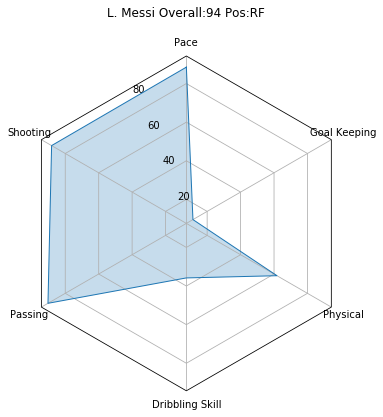

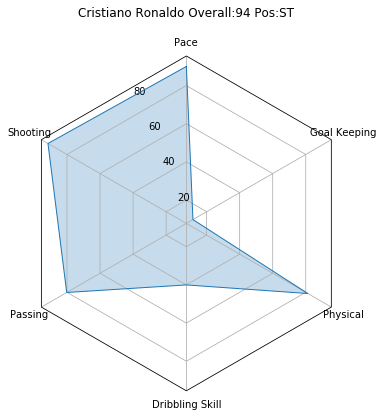

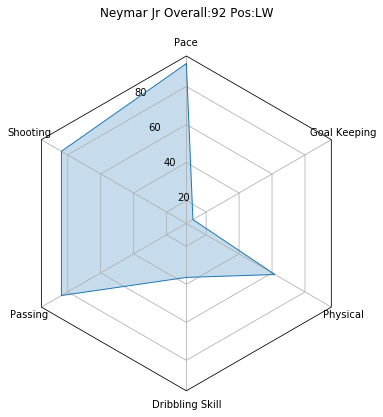

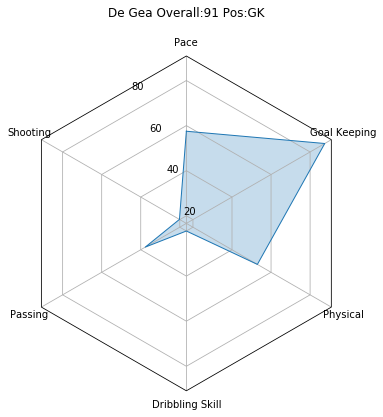

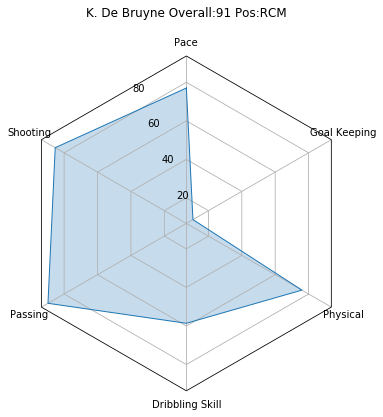

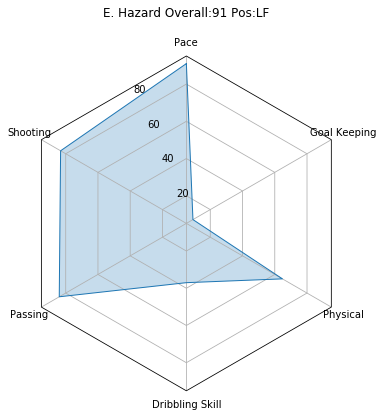

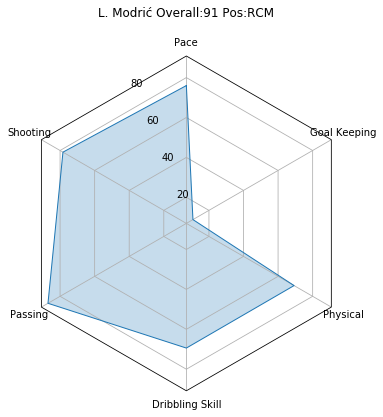

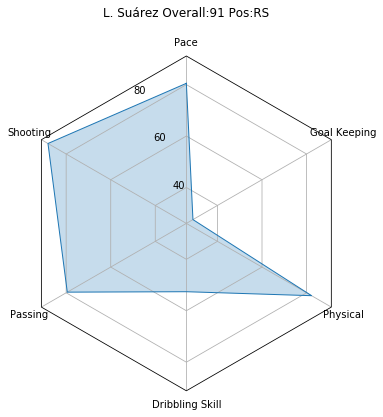

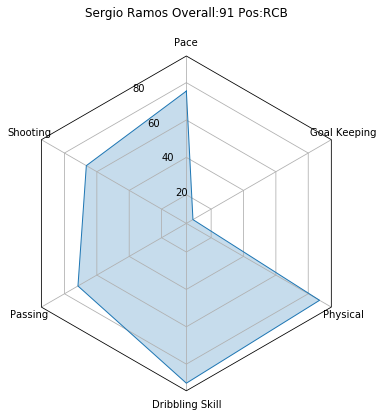

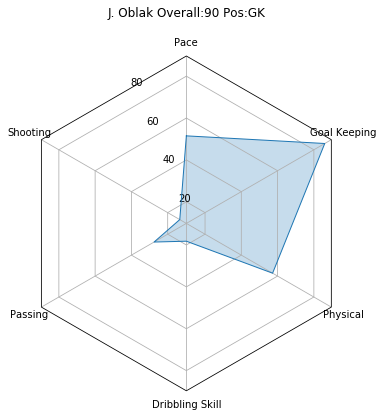

In [119]:
# Function for plotting a radar plot. Taken from (https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

top_10_plot = top_10[['Name','Age','Nationality','Club','Position','Pace','Shooting',
                     'Passing','Dribbling Skill','Physical','Goal Keeping']]
radar_plot_data = top_10[['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']]
radar_plot_data  = radar_plot_data.values.tolist()

theta = radar_factory(6, frame='polygon') # Since there are 6 attributes: Pace, Shooting,...,Goal Keeping
spoke_labels = ['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']



count = 0
for d in radar_plot_data:
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids([20,40, 60, 80])
    ax.set_title(top_10['Name'][count] + " Overall:" + str(top_10['Overall'][count]) + " Pos:"+ top_10['Position'][count],  position=(0.5, 1.1), ha='center')
    count += 1
    line = ax.plot(theta, d, linewidth=1, linestyle='solid')
    ax.fill(theta, d,  alpha=0.25)
    ax.set_varlabels(spoke_labels)

plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Position' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


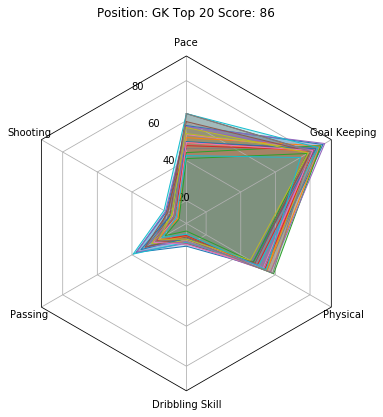

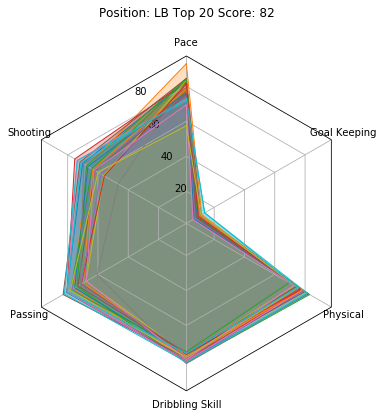

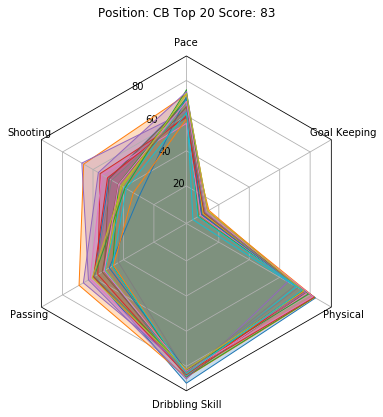

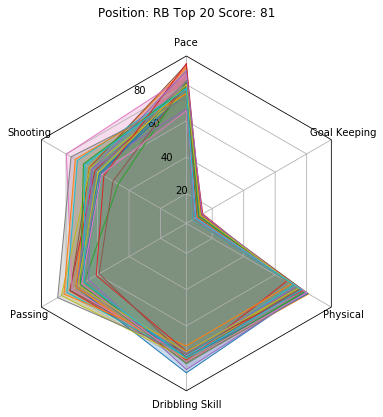

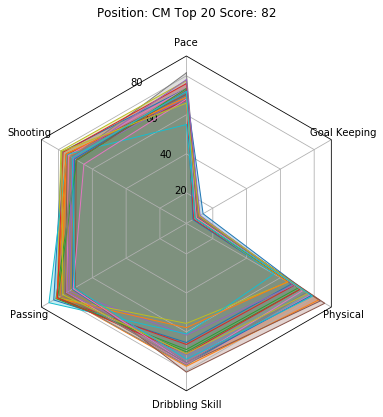

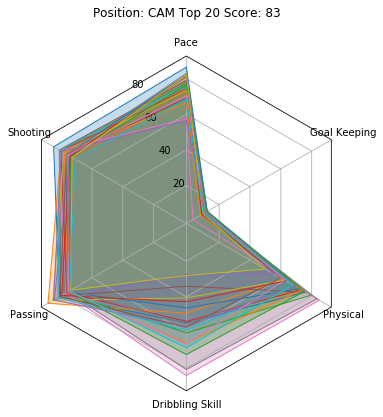

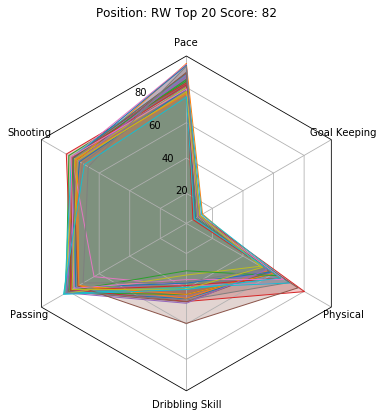

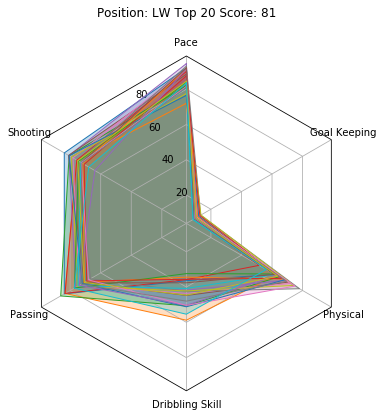

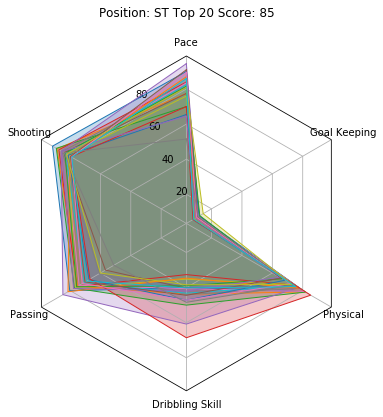

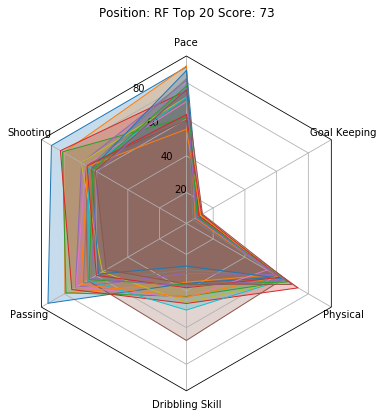

In [120]:
# The skill distribution of top 20 players in each position are:
top_20_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
top20_data = top_20_position.groupby(['Position']).head(20)
top20_data = top20_data[['Name','Age','Nationality','Overall','Club','Position','Pace','Shooting',
                     'Passing','Dribbling Skill','Physical','Goal Keeping']]
Positions = ['GK','LB','CB','RB','CM','CAM','RW','LW','ST','RF']
for position in Positions: 
    dat1 = top20_data[top20_data['Position']==position]
    radar_plot_data = dat1[['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']]
    radar_plot_data = radar_plot_data.values.tolist()
    theta = radar_factory(6, frame='polygon') # Since there are 6 attributes: Pace, Shooting,...,Goal Keeping
    spoke_labels = ['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids([20,40, 60, 80])
    ax.set_title("Position: " + position + " Top 20 Score: "+ str(int(dat1['Overall'].mean())),  position=(0.5, 1.1), ha='center')
    for d in radar_plot_data:
        line = ax.plot(theta, d, linewidth=1, linestyle='solid')
        ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)
    plt.show()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'Position' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  import sys
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


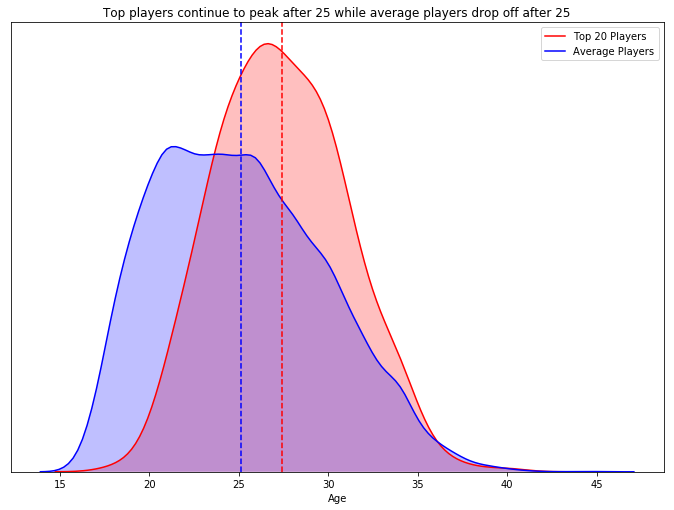

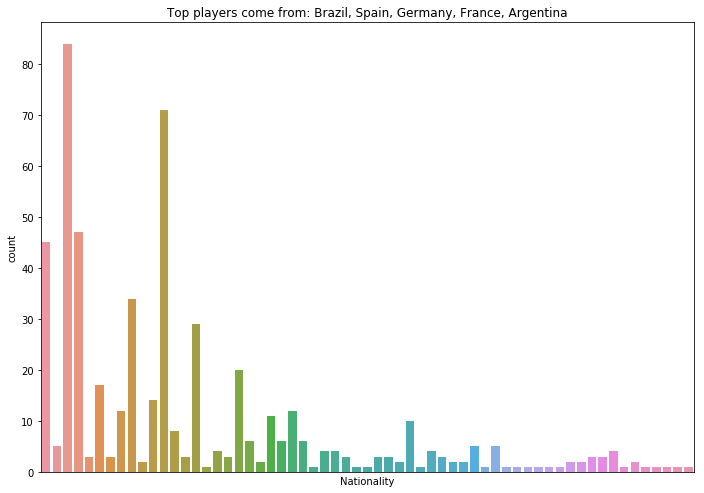

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


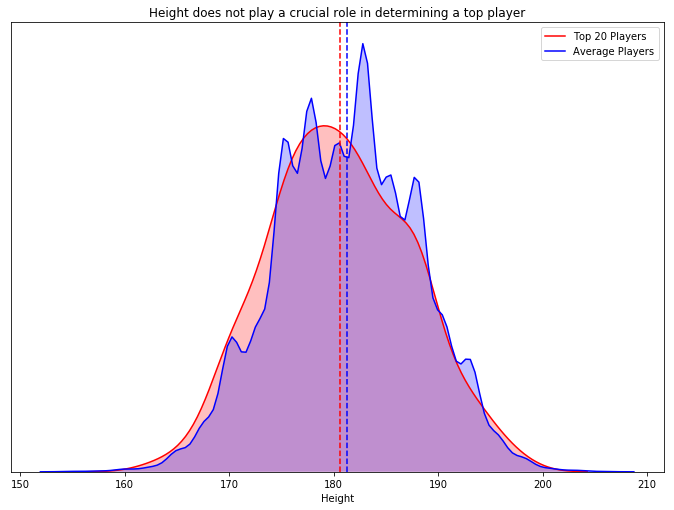

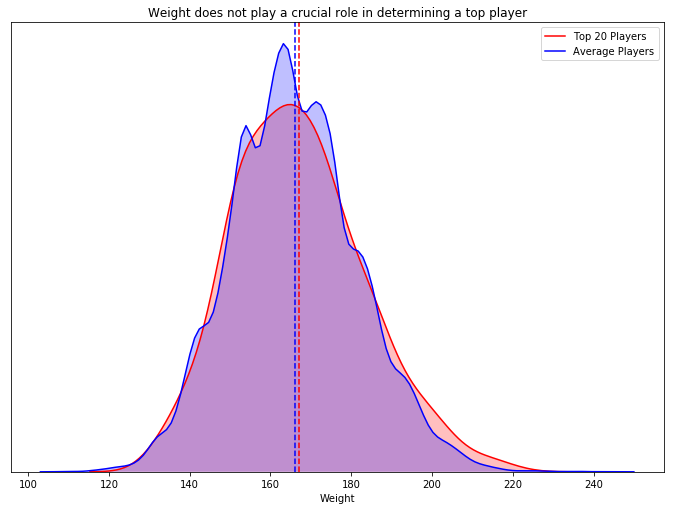

In [121]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

top_20_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
top20_data = top_20_position.groupby(['Position']).head(20)


# Distribution of their ages
p1=sns.kdeplot(top20_data['Age'], shade=True, color="r", label='Top 20 Players')
p2=sns.kdeplot(dat['Age'], shade=True, color="b", label='Average Players')
p1.axvline(top20_data['Age'].mean(), color='r', linestyle='--')
p2.axvline(dat['Age'].mean(), color='b', linestyle='--')
plt.xlabel('Age')
plt.yticks([])
plt.title('Top players continue to peak after 25 while average players drop off after 25')
plt.show()

# Distribution of their nationality
p1 = sns.countplot(x="Nationality", data=top20_data)
plt.xticks([])
plt.title('Top players come from: Brazil, Spain, Germany, France, Argentina')
plt.show()

# Distribution of their height
p1=sns.kdeplot(top20_data['Height'], shade=True, color="r", label='Top 20 Players')
p2=sns.kdeplot(dat['Height'], shade=True, color="b", label='Average Players')
p1.axvline(top20_data['Height'].mean(), color='r', linestyle='--')
p2.axvline(dat['Height'].mean(), color='b', linestyle='--')
plt.xlabel('Height')
plt.yticks([])
plt.title('Height does not play a crucial role in determining a top player')
plt.show()

# Distribution of their weight
p1=sns.kdeplot(top20_data['Weight'], shade=True, color="r", label='Top 20 Players')
p2=sns.kdeplot(dat['Weight'], shade=True, color="b", label='Average Players')
p1.axvline(top20_data['Weight'].mean(), color='r', linestyle='--')
p2.axvline(dat['Weight'].mean(), color='b', linestyle='--')
plt.xlabel('Weight')
plt.yticks([])
plt.title('Weight does not play a crucial role in determining a top player')
plt.show()


# Distribution of their reputation and ratings


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


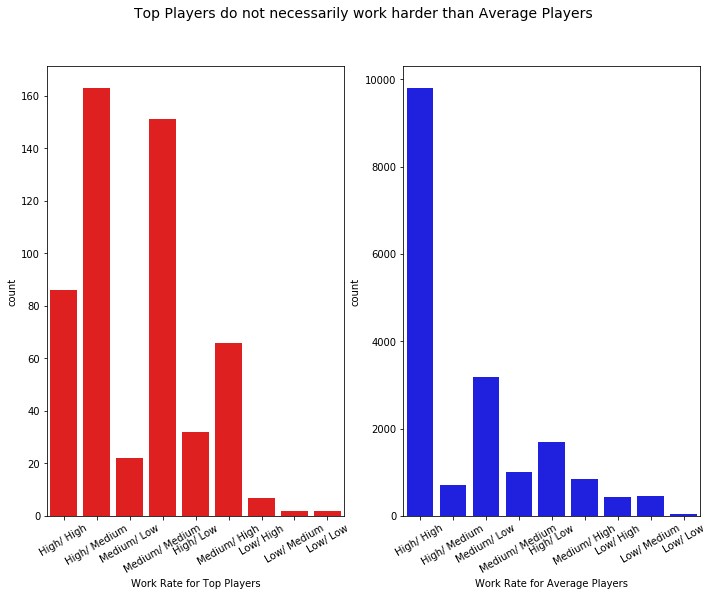

In [122]:
# Distribution of their work rate
plt, ax =plt.subplots(1,2)
plt.suptitle("Top Players do not necessarily work harder than Average Players", fontsize=14)

g = sns.countplot(x="WorkRate", data=top20_data, color="r", label='Top 20 Players', ax=ax[0])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
g.set(xlabel = 'Work Rate for Top Players')


g2 = sns.countplot(x="WorkRate", data=dat, color="b", label='Average Players',ax=ax[1])
g2.set_xticklabels(g.get_xticklabels(),rotation=30)
g2.set(xlabel='Work Rate for Average Players')
plt.show()


AttributeError: 'Figure' object has no attribute 'title'

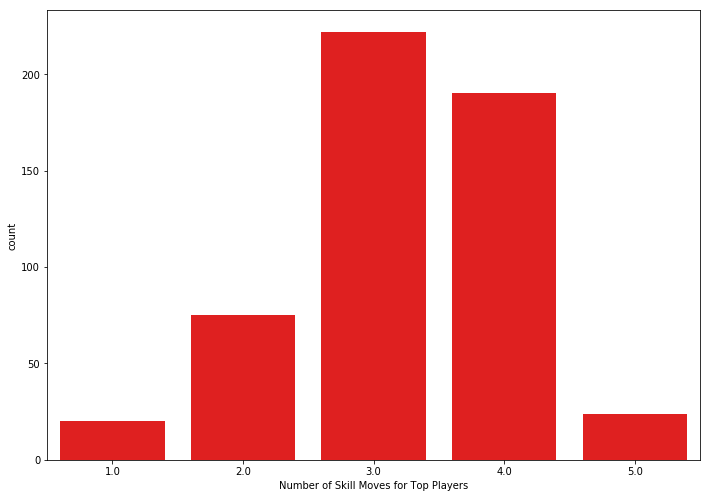

In [135]:
# Distribution of their skill moves
p1 = sns.countplot(x="SkillMoves", data=top20_data, color="r")
p1.set(xlabel='Number of Skill Moves for Top Players')
#plt.title('Top Players have more Skill Moves than Average Players')
plt.show()



C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


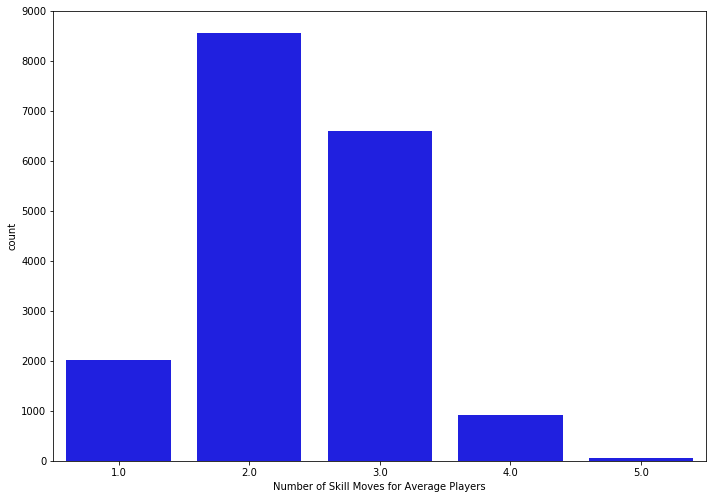

In [137]:
g2 = sns.countplot(x="SkillMoves", data=dat, color="b")
g2.set(xlabel='Number of Skill Moves for Average Players')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


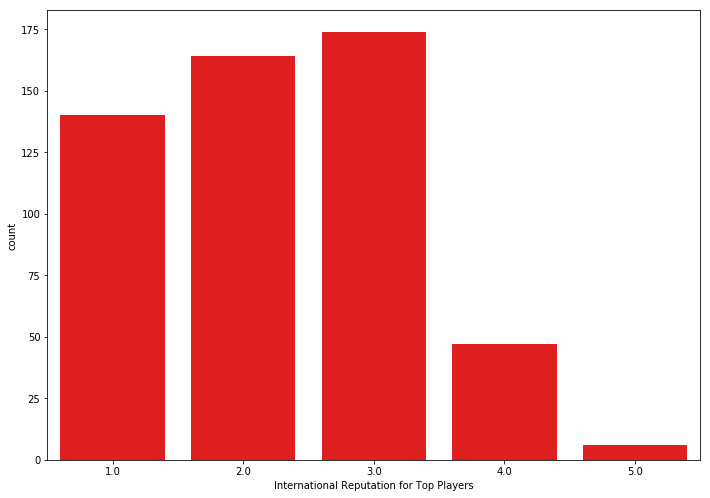

In [138]:
# Distribution of their skill moves
p1 = sns.countplot(x="InternationalReputation", data=top20_data, color="r")
p1.set(xlabel='International Reputation for Top Players')
#plt.title('Top Players have more Skill Moves than Average Players')
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


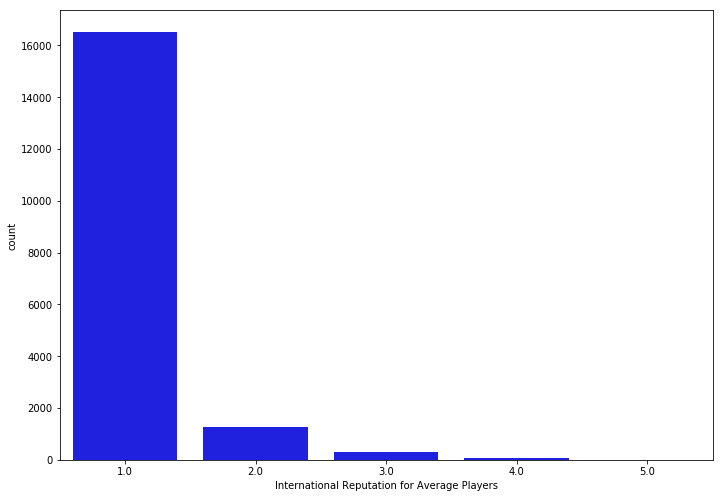

In [139]:
# Distribution of their skill moves
p1 = sns.countplot(x="InternationalReputation", data=dat, color="b")
p1.set(xlabel='International Reputation for Average Players')
#plt.title('Top Players have more Skill Moves than Average Players')
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


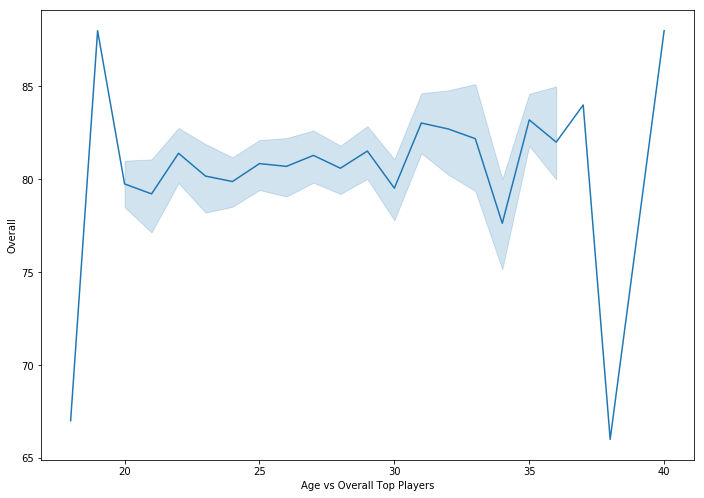

In [157]:

g = sns.lineplot(top20_data['Age'], top20_data['Overall'], palette = 'Wistia')
g.set(xlabel = 'Age vs Overall Top Players')
plt.show()



C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


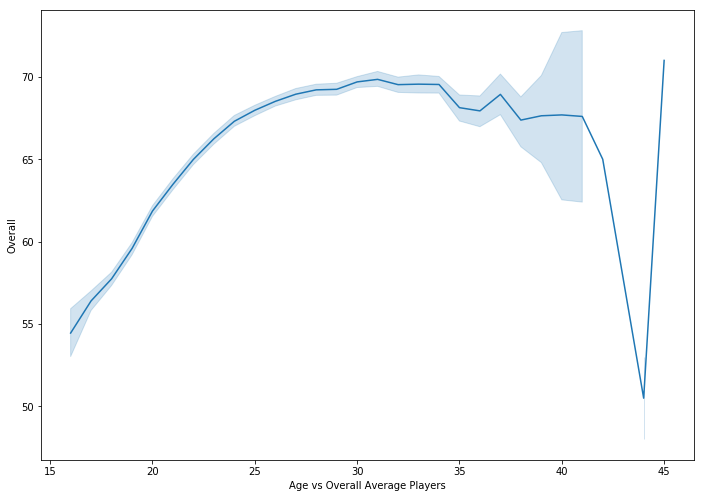

In [158]:

g = sns.lineplot(dat['Age'], dat['Overall'], palette = 'Wistia')
g.set(xlabel = 'Age vs Overall Average Players')

plt.show()

## Insights on the characteristics of the best players:

In this study, the top players are defined as the top 20 players in each playing position based on their overall performance. Based on the analysis and comparison of the top players with the average players on the characteristics like weight, height, age, nationality, club, work rate, reputation and skills. We have identified the following characteristics:

- Top players tend to peak after 25 while average players play worse off after 25
- Height and weight do not play an important role in identifying top and average players
- Top players are often from Europe (France, Germany, Spain) and South America (Argentina, Brazil)
- Top players do not necessarily have a higher work rate as compared to the average players
- Top players have more skills than the average players 
- Top players know how to maintain their overall performance for a longer period of their careers (until 35 years old)

